# ROC-AUC and PRC comparison
I had compared and display the ROC and PR curves in a balanced and imbalanced dataset, which have similar class separability.

We can change the separability parameter when we create the toy dataset, to compare results on datasets with different degree of class separability.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    roc_auc_score,
    plot_precision_recall_curve,
    plot_roc_curve,
)

# Creating data

In [ ]:
# function to create data

def create_data(imbalanced=True, separability=3):
    
    # Configuration options
    blobs_random_seed = 42
    centers = [(0, 0), (separability, separability)]
    cluster_std = 1.5
    num_features_for_samples = 2
    num_samples_total = 1600

    # Generate X
    X, y = make_blobs(
        n_samples=num_samples_total,
        centers=centers,
        n_features=num_features_for_samples,
        cluster_std=cluster_std)

    # transform arrays to pandas formats
    X = pd.DataFrame(X, columns=['VarA', 'VarB'])
    y = pd.Series(y)
    
    if imbalanced:
    # create an imbalancced Xset
    # (make blobs creates same number of obs per class
    # we need to downsample manually)
        X = pd.concat([
            X[y == 0].sample(1500,replace=True, random_state=34),
            X[y == 1].sample(100, random_state=42)
        ], axis=0)

        y = y.loc[X.index]
    # display size
    print(X.shape, y.shape)
    return X, y    


# Created balanced data

(1600, 2) (1600,)


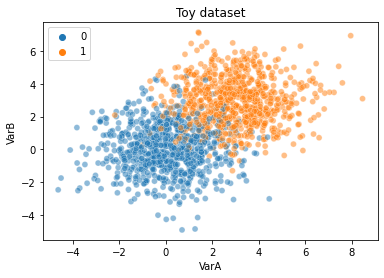

In [ ]:
X, y = create_data(imbalanced=False, separability=3)

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [ ]:
# balanced target

y.value_counts() / len(y)

1    0.5
0    0.5
dtype: float64

# Created imbalanced dataset

(1600, 2) (1600,)


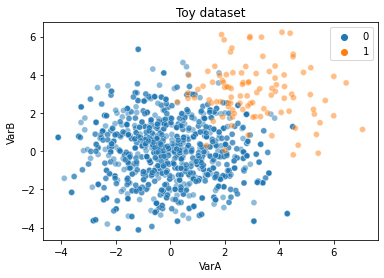

In [ ]:
X_im, y_im = create_data(imbalanced=True, separability=3)

sns.scatterplot(
    data=X_im, x="VarA", y="VarB", hue=y_im, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [ ]:
# imbalanced target

y_im.value_counts() / len(y_im)

0    0.9375
1    0.0625
dtype: float64

# separated data in train and test

In [ ]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1120, 2), (480, 2))

In [ ]:
# separate dataset into train and test

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(
    X_im, y_im, test_size=0.3, random_state=0)

X_train_im.shape, X_test_im.shape

((1120, 2), (480, 2))

# Training Random Forests

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=39)

In [ ]:
rf_im = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf_im.fit(X_train_im, y_train_im)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=39)

# ROC-AUC

In [ ]:
print('ROC-AUC Balanced data test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Imbalanced data test:', roc_auc_score(y_test_im, rf_im.predict_proba(X_test_im)[:,1]))

ROC-AUC Balanced data test: 0.9680669041134157
ROC-AUC Imbalanced data test: 0.9754115513392858


# Plotting ROC curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


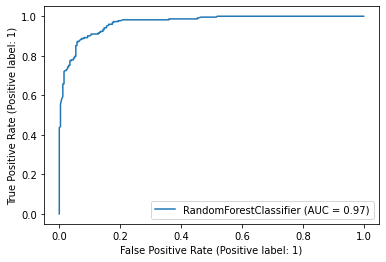

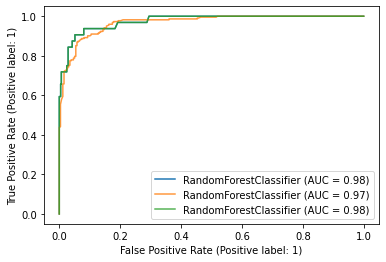

In [ ]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
rf_im_disp = plot_roc_curve(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
rf_im_disp.plot(ax=ax, alpha=0.8)

# PRC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


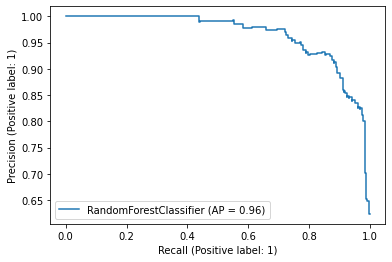

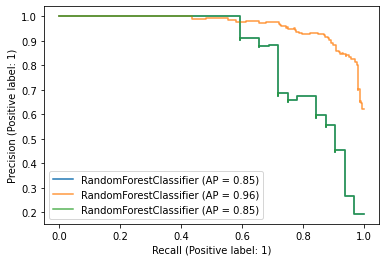

In [ ]:
rf_disp = plot_precision_recall_curve(rf, X_test, y_test)
rf_im_disp = plot_precision_recall_curve(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
rf_im_disp.plot(ax=ax, alpha=0.8)

We see that because the values of the ROC-AUC are already high, it is harder to discriminate the performance of the models.

But the PRC curve makes that difference more visually clear